In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Load and Inspect

In [151]:
path = '../../Data_Source/bank_marketing_dataset.csv'
df = pd.read_csv(path)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [152]:
df.shape

(11162, 17)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [154]:
# missing values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [155]:
# required features
df = df[['age', 'job', 'balance', 'loan', 'contact']]

# Exploratory Data Analysis

In [156]:
df.columns

Index(['age', 'job', 'balance', 'loan', 'contact'], dtype='object')

### Age

C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


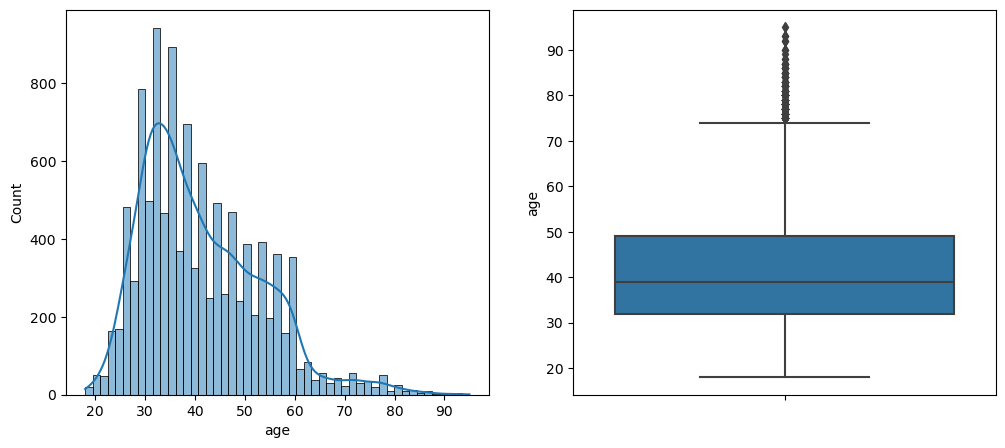

In [157]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='age', kde=True)
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='age')
plt.show()

### Job

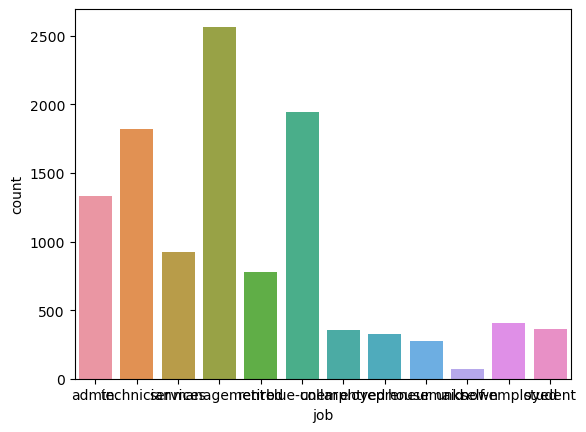

In [158]:
sns.countplot(data=df, x='job')
plt.show()

### balance

In [159]:
df.balance.dtype

dtype('int64')

C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


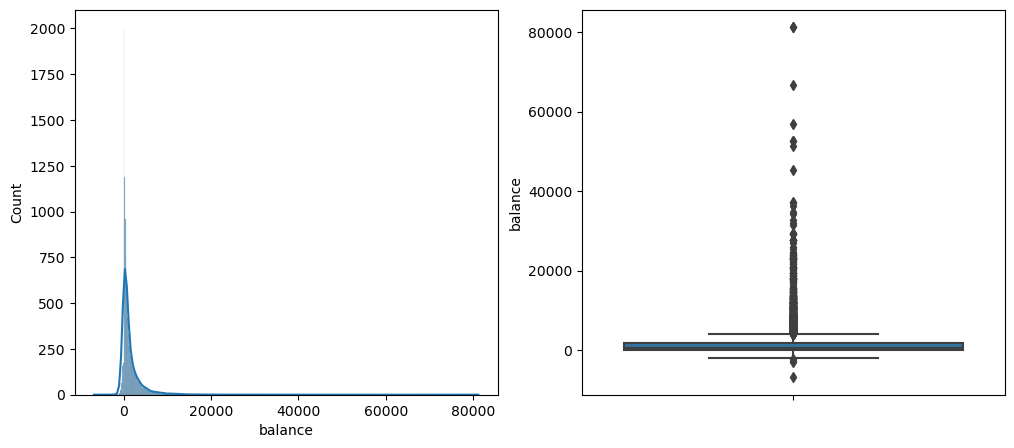

In [160]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='balance', kde=True)
plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='balance')
plt.show()

# loan status

In [161]:
df.loan.dtype

dtype('O')

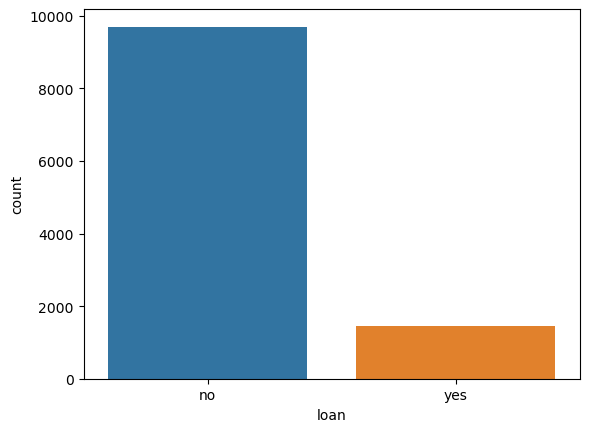

In [162]:
sns.countplot(data=df, x='loan')
plt.show()

# Contact 

In [163]:
df.contact.dtype

dtype('O')

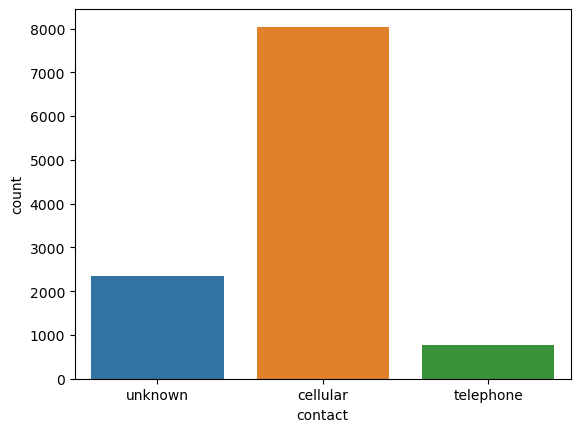

In [164]:
sns.countplot(data=df, x='contact')
plt.show()

# Hanlding Outliers

### Age

In [165]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [166]:
outliers_count = df[(df['age'] >= upper_bound) | (df['age'] <= lower_bound)]['age'].count()
percent = outliers_count / len(df) * 100

print(f'Outliers Count: {outliers_count}')
print(f'Percentage of Outliers: {percent}')

Outliers Count: 171
Percentage of Outliers: 1.5319835154990145


In [167]:
df.shape

(11162, 5)

In [168]:
df = df[(df['age'] < upper_bound) & (df['age'] > lower_bound)]

In [169]:
df.shape

(10991, 5)

### Balance

In [170]:
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [171]:
outliers_count = df[(df['balance'] >= upper_bound) | (df['balance'] <= lower_bound)]['balance'].count()
percent = outliers_count / len(df) * 100

print(f'Outliers Count: {outliers_count}')
print(f'Percentage of Outliers: {percent}')

Outliers Count: 1037
Percentage of Outliers: 9.434992266399782


In [172]:
df.shape

(10991, 5)

In [173]:
# df = df[(df['balance'] < upper_bound) & (df['balance'] > lower_bound)]
df = df[df['balance'] < 40000]

In [174]:
df.shape

(10985, 5)

# Encoding Features

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10985 entries, 0 to 11161
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   age      10985 non-null  int64 
 1   job      10985 non-null  object
 2   balance  10985 non-null  int64 
 3   loan     10985 non-null  object
 4   contact  10985 non-null  object
dtypes: int64(2), object(3)
memory usage: 514.9+ KB


In [176]:
le = LabelEncoder()

In [177]:
for feature in df.columns:
    if df[feature].dtype == 'object':
        print(f'Feature: {feature}')
        print(f'Before encoding:\n{df[feature].unique()}')
        df[feature] = le.fit_transform(df[feature])
        print(f'After encoding:\n{df[feature].unique()}\n')

Feature: job
Before encoding:
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
After encoding:
[ 0  9  7  4  5  1 10  2  3 11  6  8]

Feature: loan
Before encoding:
['no' 'yes']
After encoding:
[0 1]

Feature: contact
Before encoding:
['unknown' 'cellular' 'telephone']
After encoding:
[2 0 1]



# Feature Separation

In [178]:
X = df.drop('loan', axis=1)
y = df.loan

# Train Test Split

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Building

In [180]:
model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_leaf=50,
    min_samples_split=25,
    max_features=3
)
model.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,5
,min_samples_split,25
,min_samples_leaf,50
,min_weight_fraction_leaf,0.0
,max_features,3
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# Testing Score

In [181]:
y_pred = model.predict(X_test)

In [182]:
# accuracy
accuracy_score(y_test, y_pred)

0.8701456310679612

In [183]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      2868
           1       0.00      0.00      0.00       428

    accuracy                           0.87      3296
   macro avg       0.44      0.50      0.47      3296
weighted avg       0.76      0.87      0.81      3296



C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


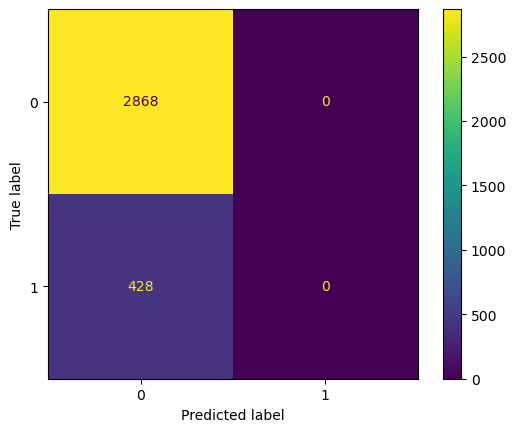

In [184]:
# confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_pred
)

# Tree Plot

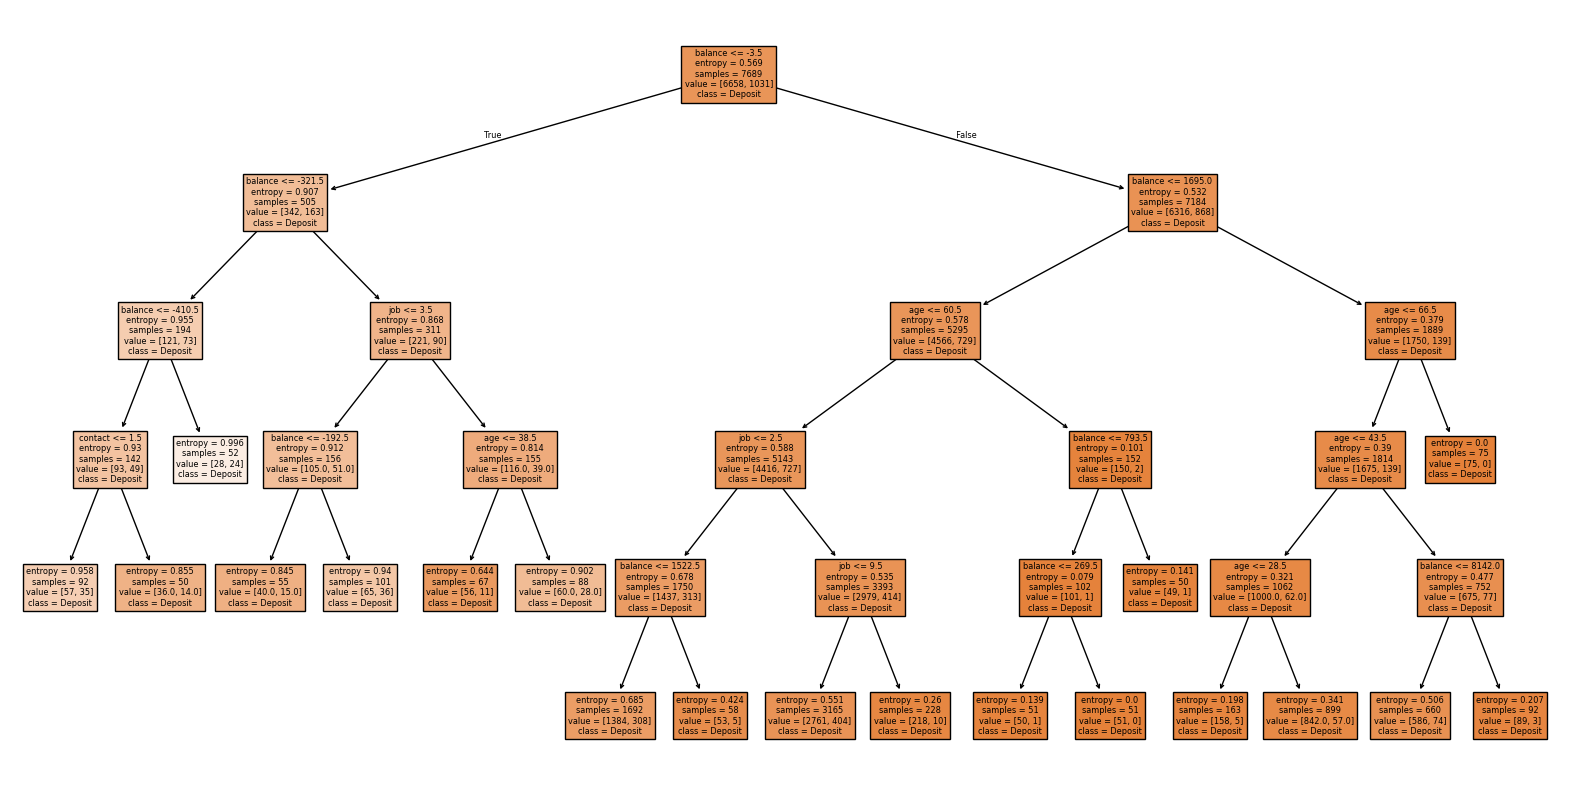

In [185]:
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=['Deposit', 'No Deposit'],
    filled=True
)
plt.show()